In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [6]:
X,y = make_regression(n_samples=100,n_features=1,n_targets=1,n_informative=1,noise=20,random_state=13)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()
LReg.fit(X_train,y_train)
print(LReg.coef_)
print(LReg.intercept_)

[28.90681036]
-2.807786722362181


c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.107e+04, tolerance: 7.474e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

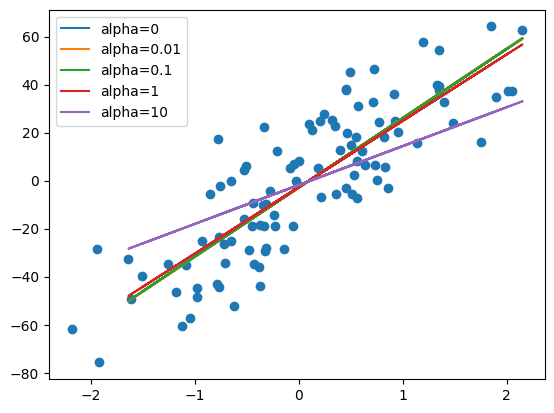

In [15]:
alphas = [0,0.01,0.1,1,10]
plt.scatter(X,y)
for i in alphas:
    LassReg = Lasso(alpha=i)
    LassReg.fit(X_train,y_train)
    y_pred_test = LassReg.predict(X_test)
    plt.plot(X_test,y_pred_test,label='alpha={}'.format(i))
plt.legend()
plt.show()
    
    

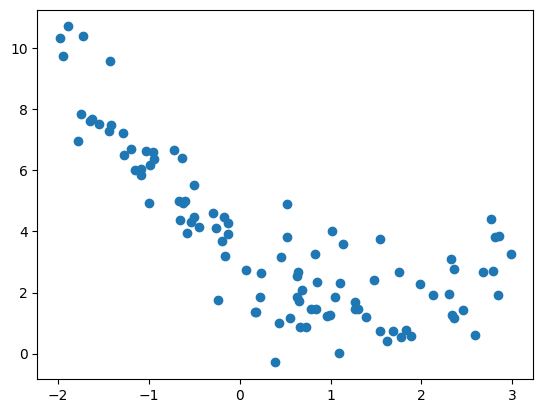

In [16]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\baps\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.921e+01, tolerance: 6.586e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers impl

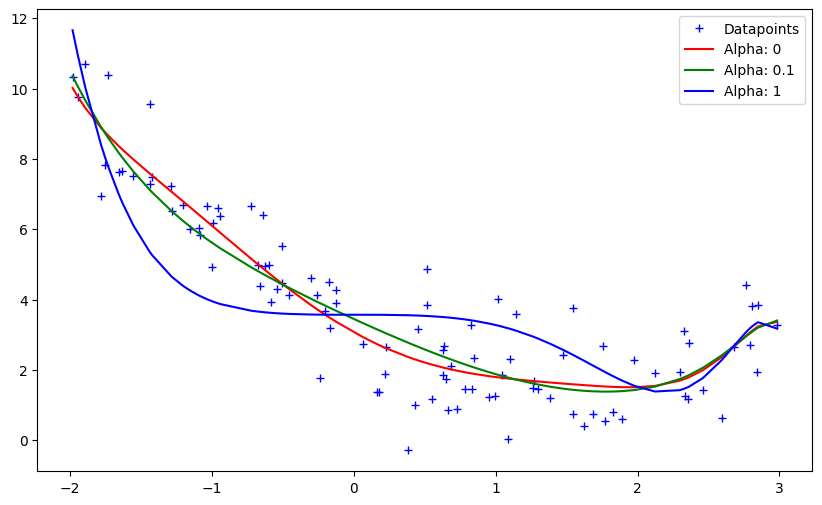

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def get_preds_lasso(X_train,y_train,alpha):
    model = Pipeline([
        ('poly_features',PolynomialFeatures(degree=16)),
        ('Lasso',Lasso(alpha=alpha)),
    ])
    model.fit(X_train,y_train)
    return model.predict(X_train)

alphas = [0,0.1,1]
cs = ['r','g','b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_lasso(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()